<a href="https://colab.research.google.com/github/daspartho/codeday-lucknow-ai-workshop/blob/main/Intro_To_Neural_Networks_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download some libraries
They will help us by expanding the functionalities of python

In [ ]:
!pip install opendatasets
!pip install tensorflow
!pip install pandas
!pip install numpy
!pip install matplotlib

# Import libraries to our notebook

In [ ]:
import opendatasets as od
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make an account on kaggle, go to your profile and download an API key, open it using your browser.

# Download our dataset
We will train our model on a data of images of Oranges and apples

In [ ]:
od.download("https://www.kaggle.com/datasets/moltean/fruits")

Skipping, found downloaded files in "./fruits" (use force=True to force download)


# Sperate test and training data
Training data is used to teach the model
Test data is hidden from the model until the end when we want to know good it works in real life circumstances.

In [ ]:
Test_Directory = "./fruits/fruits-360_dataset/fruits-360/Test/"
classes = ["Apple Red 1", "Orange"]
Test_Data = []
img_size = 100
for i in classes:
  path = os.path.join(Test_Directory, i)
  classNum = classes.index(i)
  for img in os.listdir(path):
    imagePath = os.path.join(path, img)
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    Test_Data.append([image, classNum])


In [ ]:
Training_Directory = "./fruits/fruits-360_dataset/fruits-360/Training/"
classes = ["Apple Red 1", "Orange"]
Training_Data = []
img_size = 100
for i in classes:
  path = os.path.join(Training_Directory, i)
  classNum = classes.index(i)
  for img in os.listdir(path):
    imagePath = os.path.join(path, img)
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    Training_Data.append([image, classNum])
random.shuffle(Training_Data)

# Prepare arrays of our data

In [ ]:
X_train=[]
Y_train=[]
for feature,label in Training_Data:
  X_train.append(feature)
  Y_train.append(label)

X_train=np.array(X_train)
Y_train=np.array(Y_train)

X_test = []
Y_test = []
for feature, label in Test_Data:
  X_test.append(feature)
  Y_test.append(label)

X_test=np.array(X_test)
Y_test=np.array(Y_test)


# Take a look at the images
Dimension: 100 x 100

Text(0.5, 1.0, 'Orange')

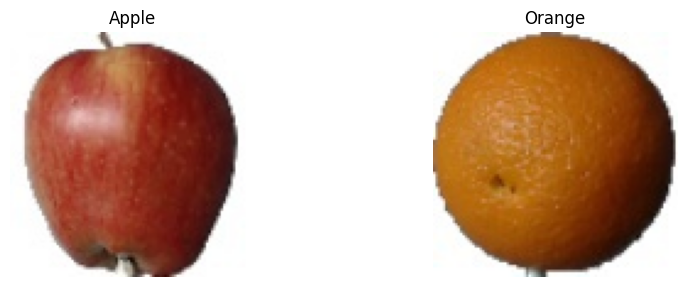

In [ ]:
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(2, 2, 1)
plt.imshow(X_test[0])
plt.axis('off')
plt.title("Apple")

fig.add_subplot(2, 2, 2)
plt.imshow(X_test[323])
plt.axis('off')
plt.title("Orange")

This shows that there are 324 images of 100 x 100 with an RGB color channel

In [ ]:
X_test.shape

(324, 100, 100, 3)

In [ ]:
X_train=X_train.reshape(-1,img_size,img_size,3)
X_train=X_train/255
X_test=X_test.reshape(-1,img_size,img_size,3)
X_test=X_test/255

In [ ]:
from sklearn.model_selection import  train_test_split
x_train,x_val,y_train,y_val=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

# Split data into validation and training sets.

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Creating our model

In [ ]:
image_width = 100
image_height = 100
image_channels = 3

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(image_width, image_height, image_channels)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

# Step 3: Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


## Model layout
- The models gets the input of 10000 pixel, which is 100 multiplied by 100.
- It has a hidden layer which consists of 128 neurons
- In the end it has an output layer of 2 neurons where one neuron represents the probability that the image is an apple and the other represents the probability that it is an orange.

In [ ]:
# Step 4: Train the model
model.fit(x_train, y_train, epochs=10, validation_split = 0.2)

# Step 5: Evaluate the model
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("Test accuracy:", test_acc)

# Step 6: Make predictions
predictions = model.predict(X_test)

Epoch 1/10
20/20 [==============================] - 2s 113ms/step - loss: 1.8840e-06 - accuracy: 1.0000 - val_loss: 5.7855e-06 - val_accuracy: 1.0000
Epoch 2/10
20/20 [==============================] - 1s 57ms/step - loss: 1.7765e-06 - accuracy: 1.0000 - val_loss: 5.4585e-06 - val_accuracy: 1.0000
Epoch 3/10
20/20 [==============================] - 1s 52ms/step - loss: 1.6774e-06 - accuracy: 1.0000 - val_loss: 5.1659e-06 - val_accuracy: 1.0000
Epoch 4/10
20/20 [==============================] - 1s 56ms/step - loss: 1.5857e-06 - accuracy: 1.0000 - val_loss: 4.9329e-06 - val_accuracy: 1.0000
Epoch 5/10
20/20 [==============================] - 2s 77ms/step - loss: 1.5126e-06 - accuracy: 1.0000 - val_loss: 4.6487e-06 - val_accuracy: 1.0000
Epoch 6/10
20/20 [==============================] - 2s 87ms/step - loss: 1.4198e-06 - accuracy: 1.0000 - val_loss: 4.3874e-06 - val_accuracy: 1.0000
Epoch 7/10
20/20 [==============================] - 1s 52ms/step - loss: 1.3483e-06 - accuracy: 1.0000 - 

In [ ]:
predictions[0]
# These numbers are in a different notation Over here I am converting it.

array([9.9999994e-01, 1.8604743e-28], dtype=float32)

In [ ]:
np.argmax(predictions[0])
predictions = [np.argmax(item) for item in predictions]

0

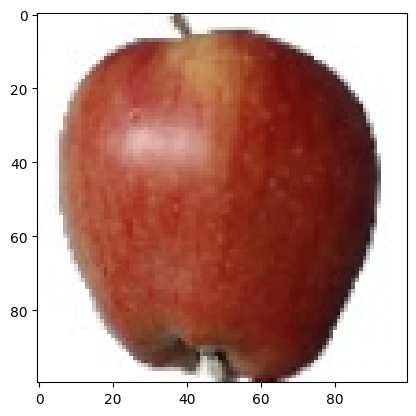

In [ ]:
plt.imshow(X_test[0])

(100, 100, 3)

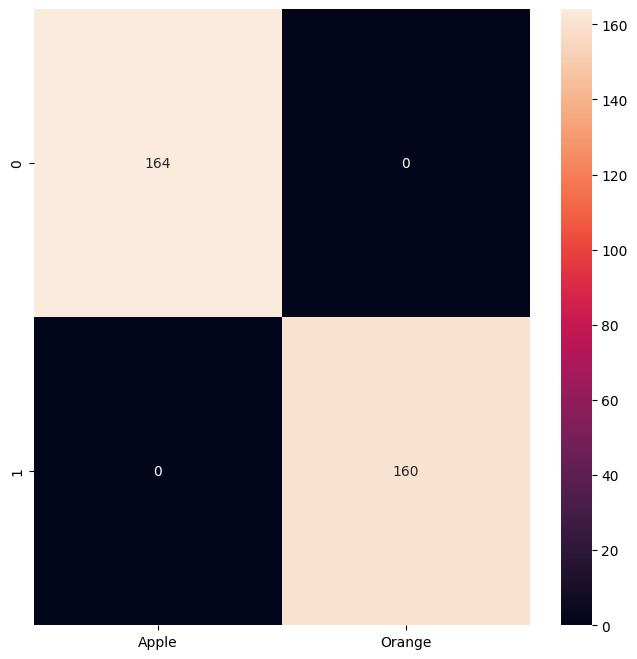

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(Y_test, predictions)
fruit_names = ["Apple", "Orange"]
f, ax = plt.subplots(figsize = (8,8))
sns.heatmap(conf_mat, annot=True, fmt=".0f")
ax.set_xticklabels(fruit_names)
plt.show()

This graph shows the number of time the image of Orange/Apple and the number of times the image predicted 0 or 1
0 represents apple and 1 represents orange.